# Exploring Community Detection

Community Detection algorithm allows users to 

In [1]:
# !pip install -q matplotlib

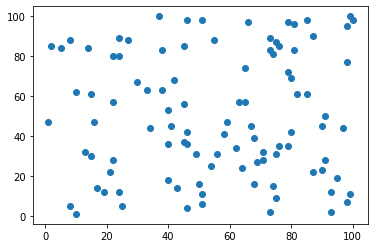

In [1]:
import matplotlib.pyplot as plt
import random
random.seed(105)
x = [random.randint(1, 100) for n in range(100)]
y = [random.randint(1, 100) for n in range(100)]
plt.scatter(x, y)
plt.show()

## Clustering them with Kmeans

In [2]:
from sklearn.cluster import KMeans
cluster_model = KMeans(n_clusters=5)

In [3]:
coords = [[x[i], y[i]] for i in range(len(x))]

In [5]:
clusters = cluster_model.fit_predict(coords)

In [6]:
# !pip install -q seaborn

In [7]:
import seaborn as sns

/Users/jacky.wong/RelevanceAi/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

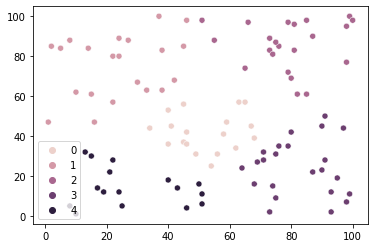

In [9]:
sns.scatterplot(x, y, clusters)

# Community Detection

From-scratch implementation. This implementation uses cosine similarity.

In [10]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

Now we calculate the cos similarity matrix

In [11]:
coords_all = np.array(coords)

In [12]:
# Create a cos sim matrix for each
cos_matrix = cos_sim(coords_all, coords_all.T)

Let us decide on some cutoff for the cosine similarity.

/Users/jacky.wong/RelevanceAi/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

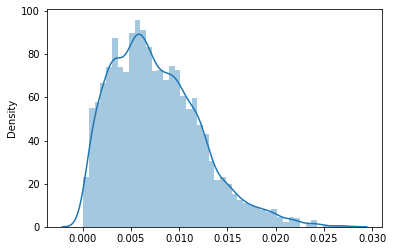

In [13]:
sns.distplot(cos_matrix.flatten())

An interesting cutoff at 0.015 - let's try it

In [14]:
CUTOFF = 0.0155
cutoff_matrix = np.where(cos_matrix > CUTOFF)

In [15]:
# All the coordinates of where the cosine matrix is greater than XYZ. Let us now build the communities
# link 1st and 2
communities = {}
for i, m in enumerate(cutoff_matrix[0]):
    link = cutoff_matrix[1][i]
    if m in communities:
        communities[m].add(link)
    else:
        # Check if already in community
        already_in_community = False
        for community_key, community in communities.items():
            if link in community:
                already_in_community = True
                break
        if not already_in_community:
            communities[m] = {link}

In [16]:
community_colors = [-1 for _ in range(len(coords))]
# for k, v in communities:
for i, comm in enumerate(communities.values()):
    for comm_member in comm:
        community_colors[comm_member] = i

/Users/jacky.wong/RelevanceAi/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

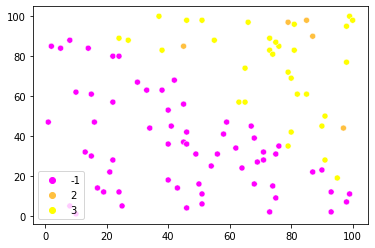

In [17]:
sns.scatterplot(x, y, community_colors, palette='spring')

For educational purposes, we re-tool community detection based on L2 distance so people can see the differences.

In [18]:
# Community Detection

# From-scratch implementation. This implementation uses cosine similarity.

In [19]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

Now we calculate the cos similarity matrix

In [20]:
import numpy as np

In [21]:
def dist(coords_all):
    return np.sqrts(coords_all[:, 0] ** 2 + coords_all[:, 1] ** 2)

In [23]:
# dist_matrix = np.empty((coords_all.shape[0], coords_all.shape[0]))
# for c in range(coords_all.shape[0]):
#     dist_matrix[c]

In [22]:
import math
# math.sqrt(abs(coords_all[0][0] - coords_all[1][0]) ** 2 + math.sqrt(abs(coords_all[1][0] - coords_all[1][1])) ** 2)

In [24]:
def distance_matrix(coords_all):
    matrix = np.empty((len(coords_all), len(coords_all)))
    for i, coord in enumerate(coords_all):
        for j, coord_2 in enumerate(y):
            matrix[i][j] = math.sqrt(abs(coords_all[i][0] - coords_all[j][0]) ** 2 + \
                                     math.sqrt(abs(coords_all[i][0] - coords_all[j][1])) ** 2)

    return matrix

l2_matrix = distance_matrix(coords_all)

Let us decide on some cutoff for the cosine similarity.


/Users/jacky.wong/RelevanceAi/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


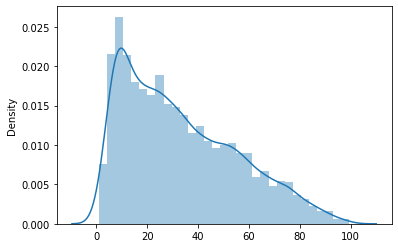

In [25]:
sns.distplot(l2_matrix.flatten())
plt.show()

In [70]:
def plot_l2_scatter(l2_matrix, ax=None, cutoff=50):
    cutoff_matrix = np.where(l2_matrix < cutoff)
    # All the coordinates of where the cosine matrix is greater than XYZ. Let us now build the communities
    # link 1st and 2
    communities = {}
    for i, m in enumerate(cutoff_matrix[0]):
        link = cutoff_matrix[1][i]
        if link == m:
            continue
        if m in communities:
            communities[m].add(link)
        else:
            # Check if already in community
            already_in_community = False
            for community_key, community in communities.items():
                if link in community:
                    already_in_community = True
                    break
            if not already_in_community:
                communities[m] = {m, link}
    
    community_colors = [-1 for _ in range(len(coords))]
    # for k, v in communities:
    for k, comm in communities.items():
        if len(comm) == 1:
            continue
        for comm_member in comm:
            community_colors[comm_member] = k
    try:
        return sns.kdeplot(
            x, y, 
            hue=community_colors, 
            palette='tab10', 
            ax=ax,
            legend=True,
    #         alpha=0.1,
    #         alpha=[0.1 if x == -1 else 1 for x in community_colors], 
        )
    except:
        return


In [41]:
%matplotlib notebook

In [78]:
# # fig, ax = plt.subplots()
# plot_l2_scatter(l2_matrix, cutoff=10)
# # fig.show()


/Users/jacky.wong/RelevanceAi/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacky.wong/RelevanceAi/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacky.wong/RelevanceAi/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

<IPython.core.display.Javascript object>


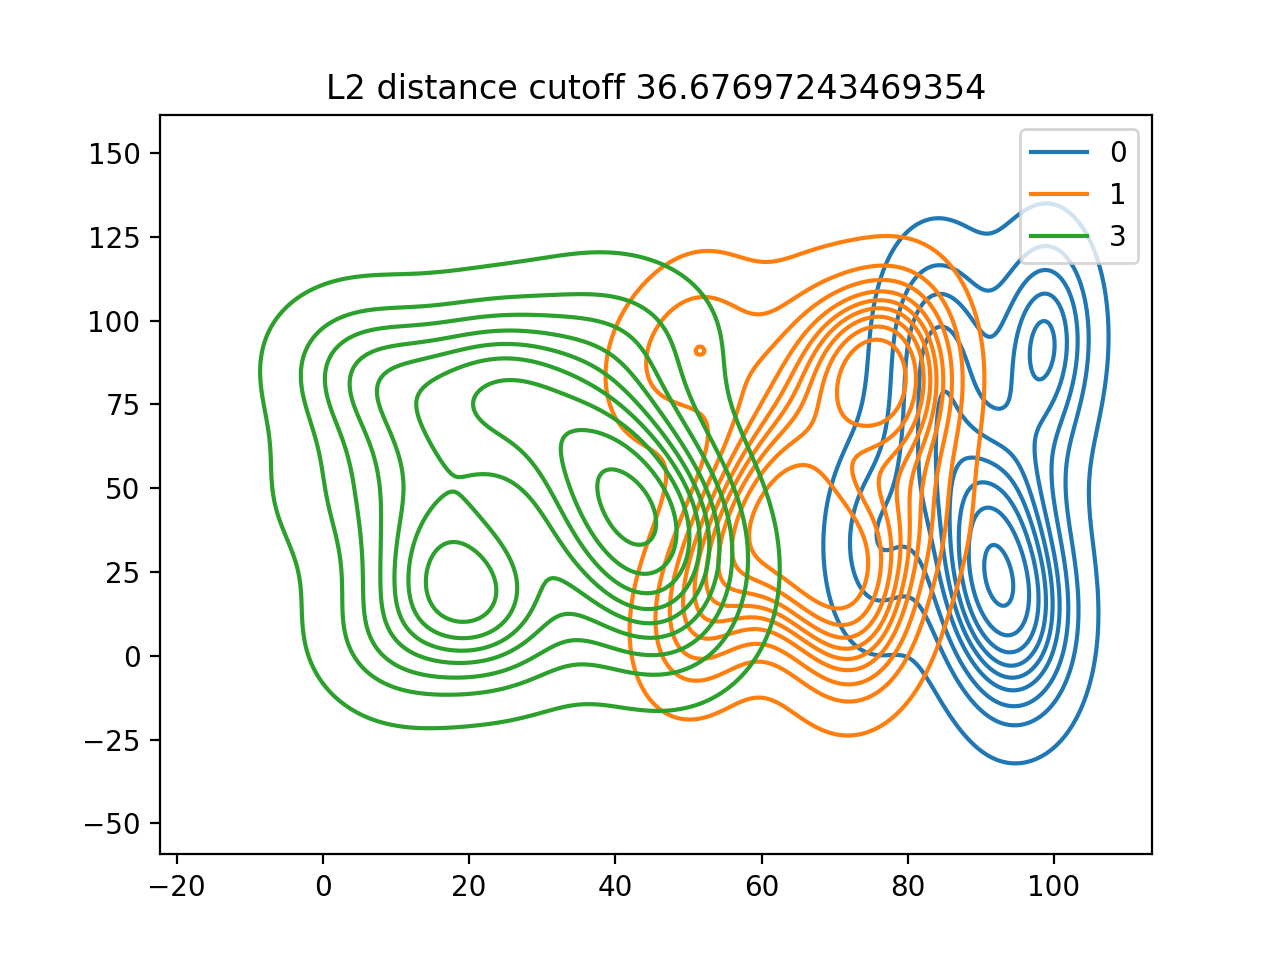

In [77]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
# plt.ioff()
fig, ax = plt.subplots()

def animate(t):
    plt.cla()
    cutoff = 11 + t ** 1.05
    plt.title(f"L2 distance cutoff {cutoff}")
    return plot_l2_scatter(l2_matrix, ax=ax, cutoff=max(0, cutoff))

animation = matplotlib.animation.FuncAnimation(fig, animate, frames=40)

In [37]:
animation.save("communities.gif", fps=1, )

/Users/jacky.wong/RelevanceAi/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacky.wong/RelevanceAi/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacky.wong/RelevanceAi/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

/Users/jacky.wong/RelevanceAi/RelevanceAI/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


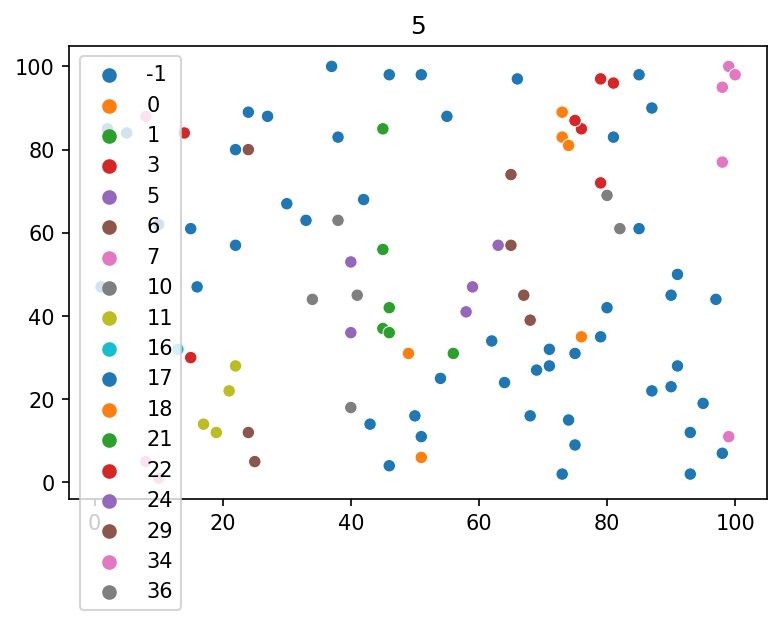

/Users/jacky.wong/RelevanceAi/RelevanceAI/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


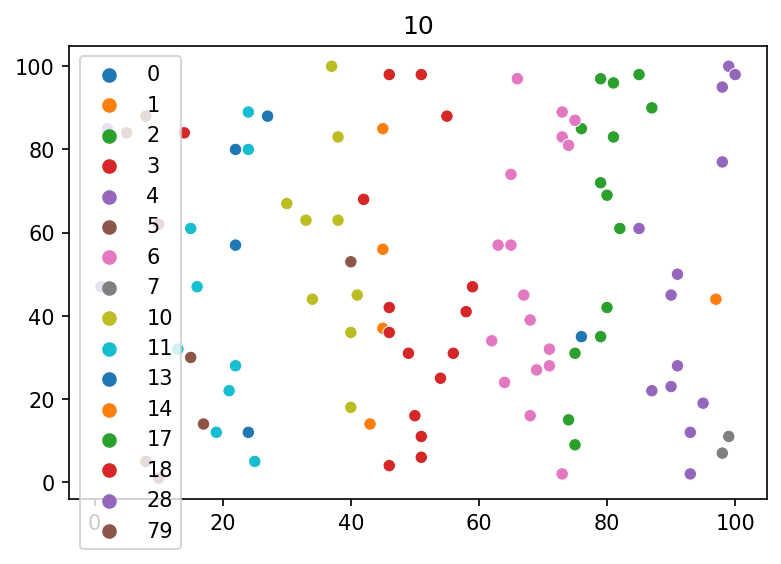

/Users/jacky.wong/RelevanceAi/RelevanceAI/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


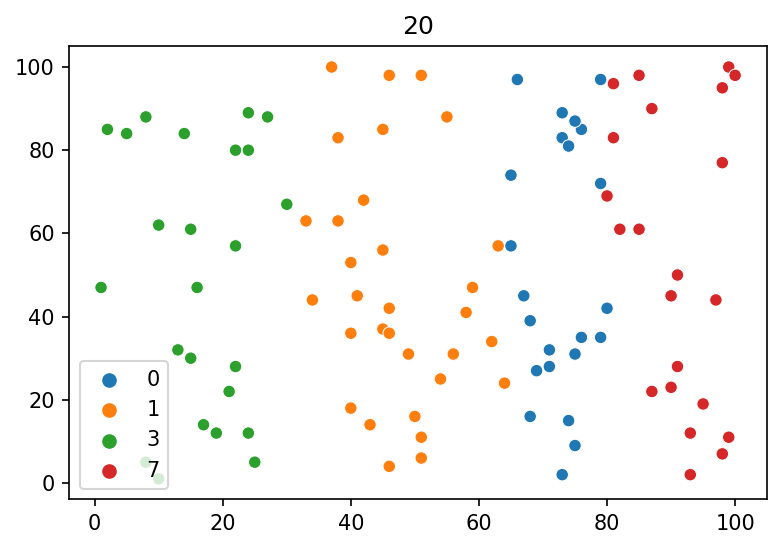

/Users/jacky.wong/RelevanceAi/RelevanceAI/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


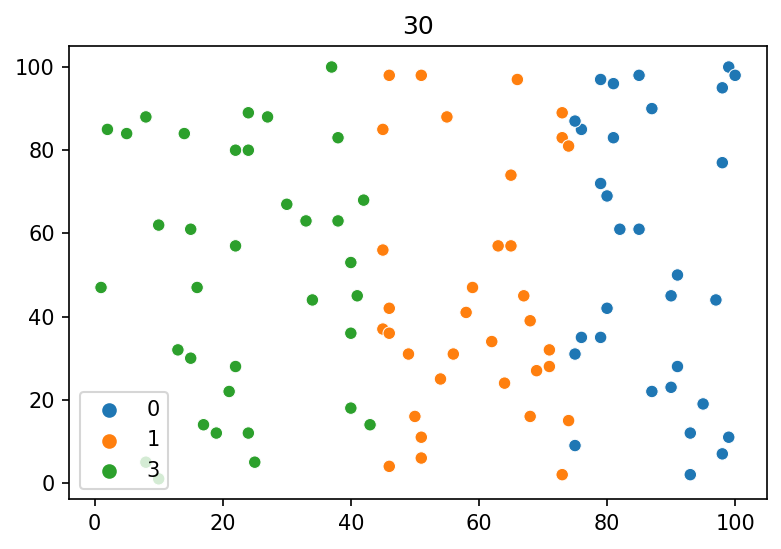

/Users/jacky.wong/RelevanceAi/RelevanceAI/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


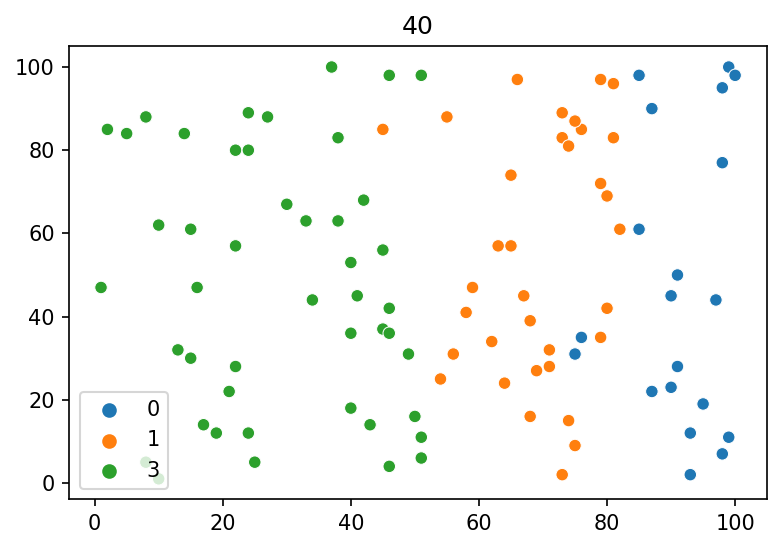

/Users/jacky.wong/RelevanceAi/RelevanceAI/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


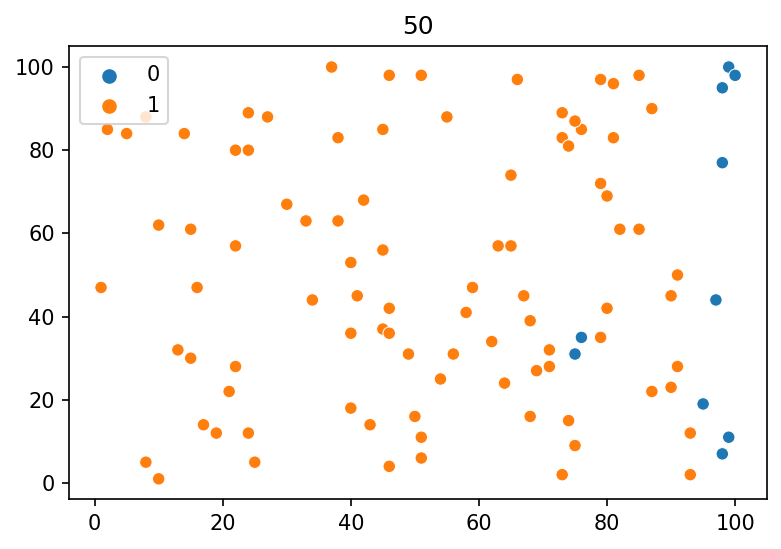

In [40]:
for cutoff in [5, 10, 20, 30, 40, 50]:
    plot_l2_scatter(l2_matrix, cutoff=cutoff)
    plt.title(cutoff)
    plt.show()

In [418]:
cutoff_matrix

(array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  2,  2,  2,  2,  2,  3,  3,
         3,  3,  4,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
         8,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13,
        13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17,
        17, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21,
        21, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 26, 26,
        26, 26, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30,
        30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 34, 34, 34, 34,
        35, 35, 36, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 40, 41, 41,
        41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 45, 45, 45,
        45, 45, 45, 46, 47, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49,
        49, 49, 50, 50, 50, 50, 51, 51, 52, 52, 52, 53, 54, 54, 54, 54, 54,
        55, 55, 55, 55, 55, 55, 56, 56, 57, 57, 57, 57, 58, 58, 58, 59, 60,
        60, 

/Users/jacky.wong/RelevanceAi/RelevanceAI/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

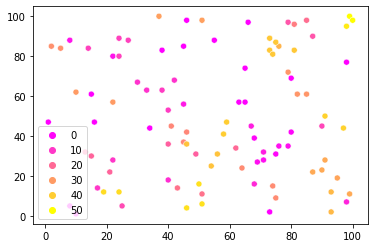

In [370]:
CUTOFF = 10
cutoff_matrix = np.where(l2_matrix < CUTOFF)

# All the coordinates of where the cosine matrix is greater than XYZ. Let us now build the communities
# link 1st and 2
communities = {}
for i, m in enumerate(cutoff_matrix[0]):
    link = cutoff_matrix[1][i]
    score = l2_matrix[m][link]
    if score == 0:
        continue
    if m in communities:
        communities[m].add(link)
    else:
        # Check if already in community
        already_in_community = False
        for community_key, community in communities.items():
            if link in community:
                already_in_community = True
                break
        if not already_in_community:
            communities[m] = {link}
community_colors = [-1 for _ in range(len(coords))]
# for k, v in communities:
for i, comm in enumerate(communities.values()):
    if len(comm) == 1:
        continue
    for comm_member in comm:
        community_colors[comm_member] = i

sns.scatterplot(x, y, hue=community_colors, palette='spring')